In [1]:
#Predicting Insurance Premiums
#loading the data set and checking what the data looks like
import pandas as pd

file_name='C:/Users/Sidharth Jahagirdar/Desktop/insurance_data.csv'
df=pd.read_csv(file_name)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
#describing the data to check various parameters and null values
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
#Correlation coeffiecients between attributes present in the dataset
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [4]:
#Creating Correlation Matrix
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    corr=df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.legend()
    cax=ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical')
    plt.yticks(range(len(corr.columns)),corr.columns)
    
plot_corr(df)

No handles with labels found to put in legend.


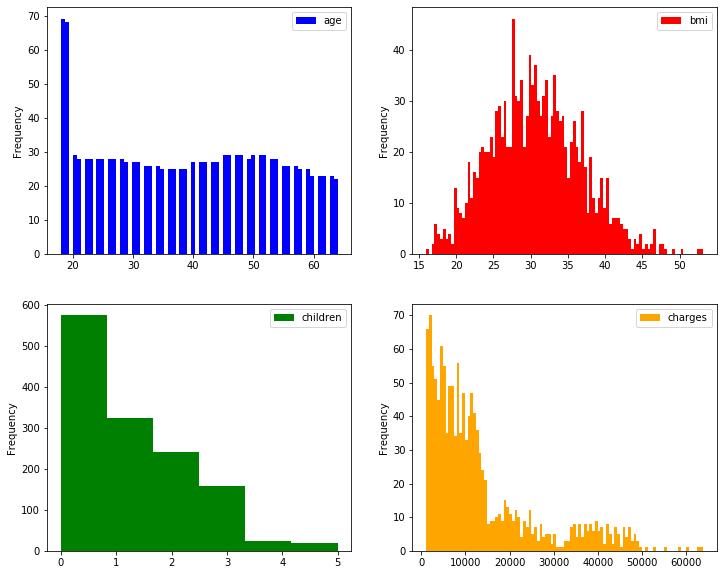

In [5]:
#Data Visualization
fig, axes= plt.subplots(nrows=2,ncols=2,figsize=(12,10))
df.plot(kind="hist",y="age",bins=70,color="b",ax=axes[0][0])
df.plot(kind="hist",y="bmi",bins=100,color="r",ax=axes[0][1])
df.plot(kind="hist",y="children",bins=6,color="g",ax=axes[1][0])
df.plot(kind="hist",y="charges",bins=100,color="orange",ax=axes[1][1])
plt.show()

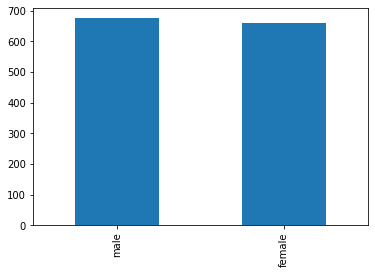

In [6]:
df["sex"].value_counts().plot(kind="bar")

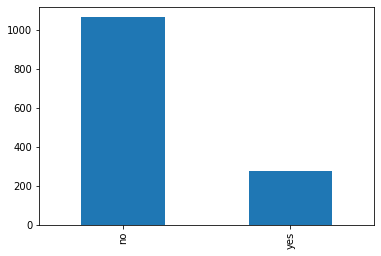

In [7]:
df["smoker"].value_counts().plot(kind="bar")

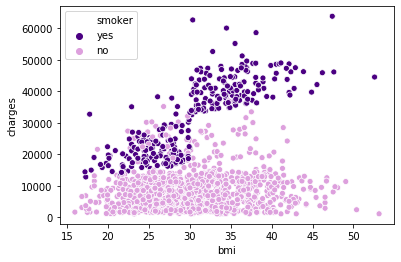

In [8]:
import seaborn as sns 
pal=["#4B0082","#DDA0DD"]
sns.scatterplot(x="bmi",y="charges",data=df,palette=pal,hue="smoker")

Text(0.5, 1, 'Smokers')

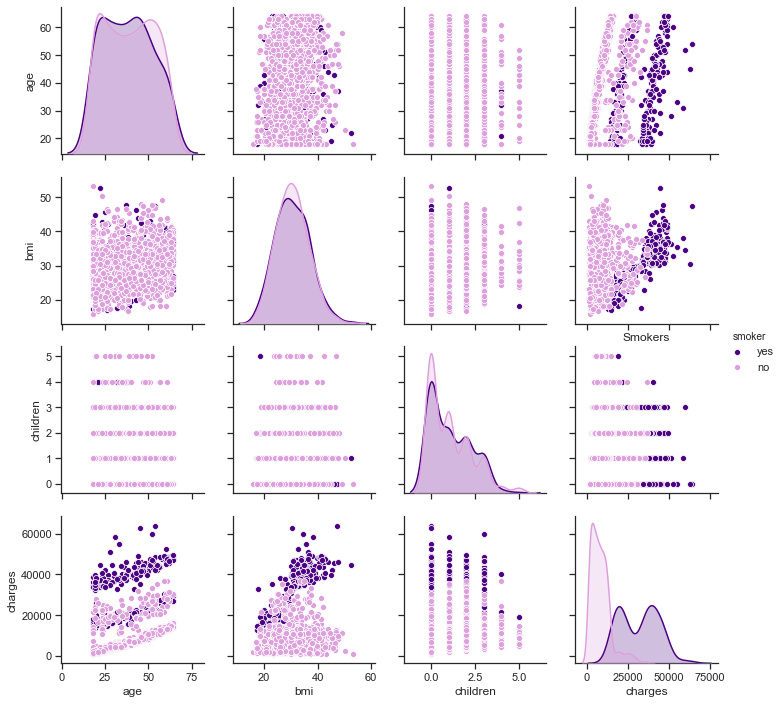

In [9]:
sns.set(style="ticks")
sns.pairplot(df,hue="smoker",palette=pal)
plt.title("Smokers")

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
#Data Cleaning
df.drop(["region"],axis=1,inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [13]:
#Converting binary categorical data to 1s and 0s
df["sex"]=df["sex"].map(lambda s :1 if s=='female' else 0)
df["smoker"]=df["smoker"].map(lambda s :1 if s=='yes' else 0)
df.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [14]:
#Creating independent and dependent variables
x=df.drop(["charges"],axis=1)
y=df.charges

In [15]:
# Creating Linear Regression Model and splitting the data into training and testing data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train,y_test=train_test_split(x,y, test_size=0.1,random_state=0)

lr=LinearRegression().fit(x_train,y_train)
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

print(lr.score(x_test,y_test))

0.8223733995140989


In [16]:
#Displaying actual results and predicted output for the data
results=pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
results

,Actual,Predicted
578,9724.53000,11455.735077
610,8547.69130,9974.538995
569,45702.02235,37559.490168
1034,12950.07120,15807.744262
198,9644.25250,7060.042422
981,4500.33925,3698.750729
31,2198.18985,1185.925653
1256,11436.73815,14062.005044
1219,7537.16390,8850.152137
1320,5425.02335,7279.510505


In [17]:
# Normalizing Data
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pd.DataFrame(x_train).head()

,0,1,2,3,4
0,0.213506,-1.003328,-0.108376,-0.90816,2.009392
1,-0.354272,-1.003328,0.022686,-0.90816,2.009392
2,0.213506,-1.003328,-0.986496,-0.90816,2.009392
3,0.781285,0.996683,-1.166707,0.74980,-0.497663
4,0.994202,0.996683,-1.274833,-0.07918,2.009392


In [18]:
pd.DataFrame(y_train).head()

,charges
461,22144.0320
322,35491.6400
224,19515.5416
711,10107.2206
58,23244.7902


In [19]:
# Creating Multi-variate Regression Model
from sklearn.metrics import accuracy_score

normreg=LinearRegression()
normreg.fit(x_train,y_train)

y_train_normreg_pred=normreg.predict(x_train)
normreg_predictions=normreg.predict(x_test)
normreg_score=normreg.score(x_test,y_test)
print(normreg_score)

0.8223733995140986


In [20]:
# Creating Polynomial Regression Model
from sklearn.preprocessing import PolynomialFeatures

poly_f=PolynomialFeatures(degree=3)
x_train_poly=poly_f.fit_transform(x_train)
x_test_poly=poly_f.fit_transform(x_test)

poly_reg=LinearRegression(fit_intercept=False)
poly_reg.fit(x_train_poly,y_train)
y_train_ployreg_pred=poly_reg.predict(x_train_poly)
polyreg_predictions=poly_reg.predict(x_test_poly)
polyreg_score=poly_reg.score(x_test_poly,y_test)
print(polyreg_score)

0.9033238682408168


In [21]:
# Creating Decision Tree Regression Model 
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg=DecisionTreeRegressor(max_depth=5,random_state=18)
dec_tree_reg.fit(x_train,y_train)

y_train_decreg_pred=dec_tree_reg.predict(x_train)
dec_tree_reg_predictions=dec_tree_reg.predict(x_test)
decreg_score=dec_tree_reg.score(x_test,y_test)
print(decreg_score)

0.8748297475953103


In [22]:
# Creating Random Forest Classifier Model 
from sklearn.ensemble import RandomForestRegressor
ran_for_reg=RandomForestRegressor(n_estimators=500,max_depth=5,random_state=18)
ran_for_reg.fit(x_train,y_train)

y_train_ranfreg_pred=ran_for_reg.predict(x_train)
ranf_reg_predictions=ran_for_reg.predict(x_test)
ranf_score=ran_for_reg.score(x_test,y_test)
print(ranf_score)

0.9161202074215896


In [23]:
# Creating Support Vector Machine Model 
from sklearn.svm import SVR
supp_reg=SVR(gamma="auto",kernel="linear",C=1000)
supp_reg.fit(x_train,y_train)

y_train_supp_pred=supp_reg.predict(x_train)
supp_reg_predictions=supp_reg.predict(x_test)
supp_score=supp_reg.score(x_test,y_test)
print(supp_score)

0.7887381259727386


In [24]:
# Creating a table to Comparing the accuracy scores of various models
ml_model=["Multi-variate Regression","Polynomial Regression","Decision Tree Regression","Random Forest Regression", 
          "Support Vector Regression"]
accuracy_scores=[normreg_score,polyreg_score,decreg_score,ranf_score,supp_score]
table_data={"Model":ml_model ,"Accuracy Score": accuracy_scores}

score_table=pd.DataFrame(data=table_data)
score_table

,Model,Accuracy Score
0,Multi-variate Regression,0.822373
1,Polynomial Regression,0.903324
2,Decision Tree Regression,0.874830
3,Random Forest Regression,0.916120
4,Support Vector Regression,0.788738
